
Sistemas de Visión.

Marvin M. Vargas Flores 1732330

# Histogramas
## ¿Qué son los histogramas?
En estadística, un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. 

En el ambito de la vision artificial los histogramas se utilizan para hacer un análisis básico de la cantidad de pixeles que hay en cada uno de los canales. Para esto, una imagen se separa en sus diferentes canales y cada uno de estos  se convierte en una imagen en escala de grises, donde los pixeles mas cercanos al blanco tienen valores mas altos y los pixeles cercanos al negro tienen valores mas bajos.

## ¿Cuáles son sus aplicaciones?
Los analisis de los canales de las imagenes son comunmente utilizados para hacer que toda la información contenida sea mas facilmente interpretable por una persona. Esto les permite poder tomar mejores decisiones respecto al curso a seguir al momento de diseñar un algoritmo de analisis para encontrar lo que se busca en la imagen. 

Por ejemplo, en el caso de un vehículo autónomo que intenta identificar las lineas amarillas en el piso se puede utilizar un histograma para definir en que rangos de que canales se encuentran los pixeles de las líneas amarillas y así definir un filtro para identificarlas de manera mas sencilla. 

# Algoritmo

In [4]:
#Importar librerias que utilizarán para realizar el análisis de las imagenes.
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def resize_images(imgs,sx,sy):
    """
    Function to resize all the images in the provided list to the specified size.
    Input:
        imgs: List of images provided to resize.
        sx: Destination size of x axis.
        sy: Destination size of y axis.
    Output:
        rsImgs: List of resized images.
    """
    rsImgs = []
    for img in imgs:
        rsImgs.append(cv.resize(img,(sx,sy)))
    
    return rsImgs

In [34]:
def calculate_histograms(imgs):
    """
    This function calculates the data for the R,G and B channels of an image and returns all the histograms in a list.
    Input:
        imgs: List of images to calculate the histograms from.
    Output:
        hists: List of lists of histograms.
    """
    hists = []
    hist = []
    histSz = [256]
    histRng = [0,256]

    for img in imgs:
        for i in range(3):
            hist.append(cv.calcHist([img],[i],None,histSz,histRng,accumulate=False))
        hists.append(hist)
        hist = []
    
    return hists


In [10]:
def cvtImgsToRGB(imgs):
    """
    OpenCV reads images in BGR format, this functions takes all the images in a list and turns them to RGB format.
    Input:
        imgs: List of images to transform.
    Output:
        rgbImgs: List of images in RGB format.
    """
    rgbImgs = []
    for img in imgs:
        rgbImgs.append(cv.cvtColor(img,cv.COLOR_BGR2RGB))

    return rgbImgs

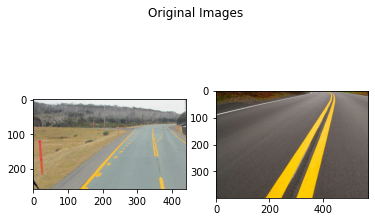

In [30]:
#Definir las variables donde se almacenara la ruta de las imagenes que se analizaran.
paths = ["yellow_lines.png","yellow_lines_2.jpg"]
#Definir las variables 
ogImgs = []

#Import images
for path in paths:
    ogImgs.append(cv.imread(path))

#Create the grid for the images
fig,axs = plt.subplots(1,len(ogImgs))
fig.suptitle("Original Images")

for i in range(len(ogImgs)):
    axs[i].imshow(cv.cvtColor(ogImgs[i],cv.COLOR_BGR2RGB))



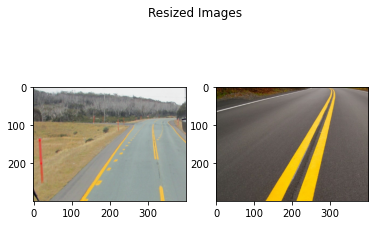

In [46]:
#Get the list of resized images.
rsImgs = resize_images(ogImgs,400,300)

#Create the grid for the images
fig,axs = plt.subplots(1,len(rsImgs))
fig.suptitle("Resized Images")

#Show the resized images.
for i in range(len(ogImgs)):
    axs[i].imshow(cv.cvtColor(rsImgs[i],cv.COLOR_BGR2RGB))

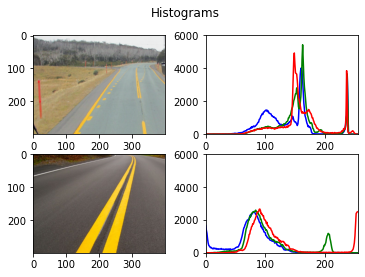

In [52]:
imgs = cvtImgsToRGB(rsImgs)
hists = calculate_histograms(rsImgs)
color = ('b','g','r')
ylim = (0,6000)
xlim = (0,256)
fig,axs = plt.subplots(2,len(imgs))
fig.suptitle("Histograms")
#fig.set_size_inches(6,5)

for i in range(len(hists)):
    axs[i,0].imshow(imgs[i])
    for j in range(3):
        axs[i,1].set_xlim(xlim)
        axs[i,1].set_ylim(ylim)
        axs[i,1].plot(hists[i][j], color = color[j])
        


# Conclusiones

# Referencias